In [1]:
a = 10
a

10

In [2]:
import pytransit as trans
import numpy as np
import matplotlib.pyplot as plt
from corner import corner


/home/abraham/miniconda3/envs/pytrans/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


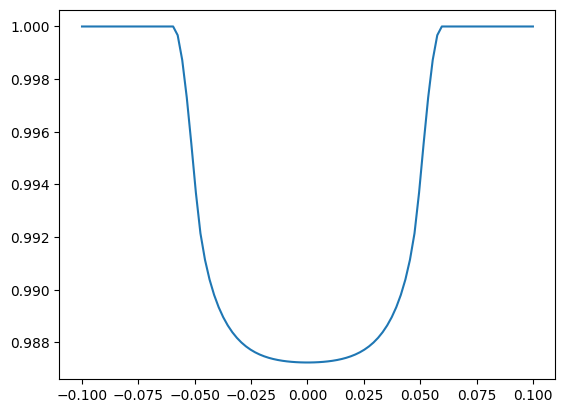

In [3]:
time = np.linspace(-0.1,0.1,100)

tm = trans.QuadraticModel()
tm.set_data(time)
flux = tm.evaluate(k=0.1, ldc=[0.2, 0.9], t0=0.0, p=1.0, a=3.0, i=0.5*np.pi)

plt.plot(time,flux)
plt.show()


In [4]:
time, flux, true_pars = trans.create_mock_light_curve(texp=60, passband='Kepler', noise=3e-4, transit_pars={'period':1})

In [4]:
type(flux)

numpy.ndarray

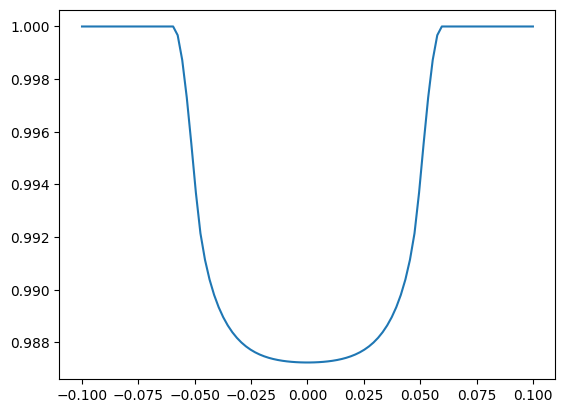

In [5]:
plt.plot(time, flux)
plt.show()

In [6]:
true_pars


NameError: name 'true_pars' is not defined

In [7]:
ta = trans.TransitAnalysis(name='tutorial_1', passbands='Kepler', times=time, fluxes=flux)


In [8]:
ta.print_parameters(1)


  0 |G| rho            U(a = 0.1, b = 25.0)                     [    0.00 ..      inf]
  1 |G| tc_1           N(μ = 0.0, σ = 0.1)                      [    -inf ..      inf]
  2 |G| p_1            N(μ = 1.0, σ = 1e-05)                    [    0.00 ..      inf]
  3 |G| b_1            U(a = 0.0, b = 1.0)                      [    0.00 ..      inf]
  4 |G| k2_1           U(a = 0.0004, b = 0.04000000000000001)   [    0.00 ..      inf]
  5 |G| secw_1         N(μ = 0.0, σ = 1e-05)                    [   -1.00 ..     1.00]
  6 |G| sesw_1         N(μ = 0.0, σ = 1e-05)                    [   -1.00 ..     1.00]
  7 |P| q1_Kepler      U(a = 0, b = 1)                          [    0.00 ..     1.00]
  8 |P| q2_Kepler      U(a = 0, b = 1)                          [    0.00 ..     1.00]
  9 |L| wn_loge_0      U(a = -4, b = 0)                         [    -inf ..      inf]


In [9]:
ta.set_prior('p_1', 'NP', 1.0, 0.001)


In [10]:
ta.print_parameters(1)

  0 |G| rho            U(a = 0.1, b = 25.0)                     [    0.00 ..      inf]
  1 |G| tc_1           N(μ = 0.0, σ = 0.1)                      [    -inf ..      inf]
  2 |G| p_1            N(μ = 1.0, σ = 0.001)                    [    0.00 ..      inf]
  3 |G| b_1            U(a = 0.0, b = 1.0)                      [    0.00 ..      inf]
  4 |G| k2_1           U(a = 0.0004, b = 0.04000000000000001)   [    0.00 ..      inf]
  5 |G| secw_1         N(μ = 0.0, σ = 1e-05)                    [   -1.00 ..     1.00]
  6 |G| sesw_1         N(μ = 0.0, σ = 1e-05)                    [   -1.00 ..     1.00]
  7 |P| q1_Kepler      U(a = 0, b = 1)                          [    0.00 ..     1.00]
  8 |P| q2_Kepler      U(a = 0, b = 1)                          [    0.00 ..     1.00]
  9 |L| wn_loge_0      U(a = -4, b = 0)                         [    -inf ..      inf]


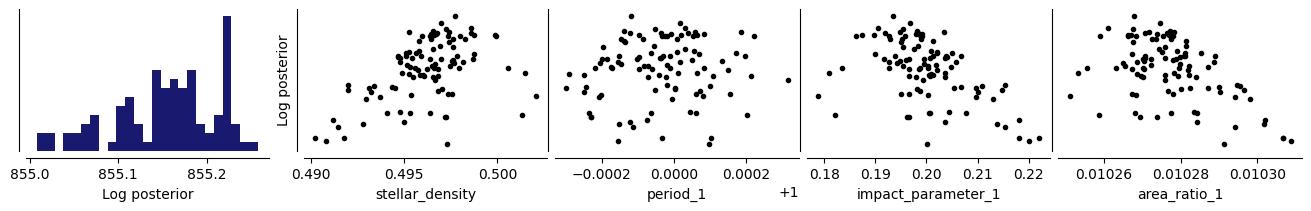

In [11]:
ta.optimize_global(niter=500, npop=100)


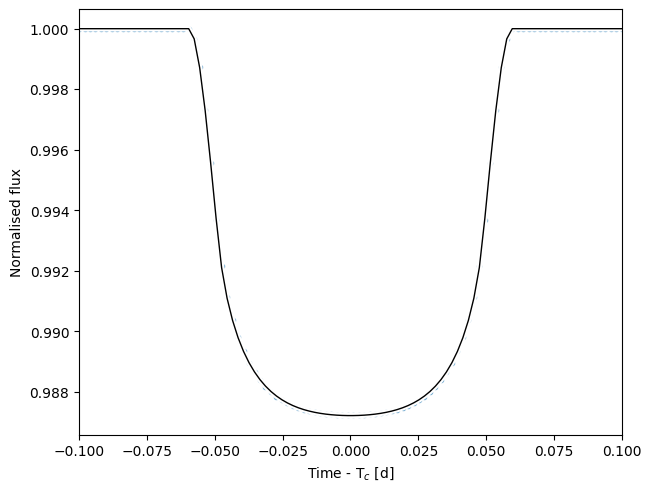

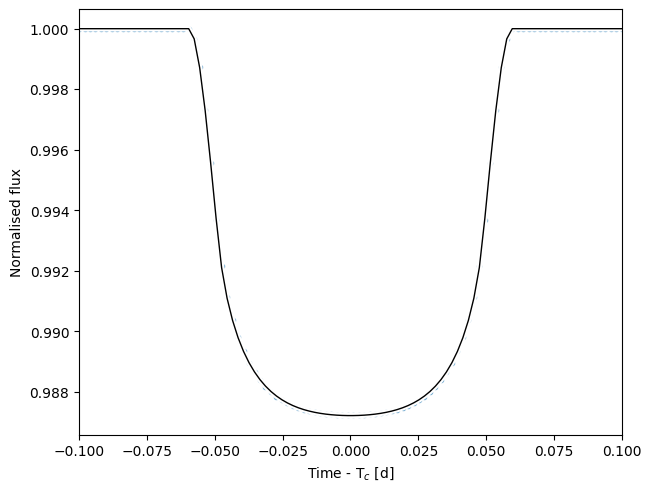

In [28]:
ta.plot_light_curves(method='fit')


In [22]:
ta.print_parameters(columns=1)

  0 |G| rho            U(a = 0.1, b = 25.0)                     [    0.00 ..      inf]
  1 |G| tc_1           N(μ = 0.0, σ = 0.1)                      [    -inf ..      inf]
  2 |G| p_1            N(μ = 1.0, σ = 0.001)                    [    0.00 ..      inf]
  3 |G| b_1            U(a = 0.0, b = 1.0)                      [    0.00 ..      inf]
  4 |G| k2_1           U(a = 0.0004, b = 0.04000000000000001)   [    0.00 ..      inf]
  5 |G| secw_1         N(μ = 0.0, σ = 1e-05)                    [   -1.00 ..     1.00]
  6 |G| sesw_1         N(μ = 0.0, σ = 1e-05)                    [   -1.00 ..     1.00]
  7 |P| q1_Kepler      U(a = 0, b = 1)                          [    0.00 ..     1.00]
  8 |P| q2_Kepler      U(a = 0, b = 1)                          [    0.00 ..     1.00]
  9 |L| wn_loge_0      U(a = -4, b = 0)                         [    -inf ..      inf]


In [14]:
ta.sample_mcmc(niter=2000, thin=20, repeats=3, save=False)

MCMC sampling: 100%|██████████| 3/3 [00:15<00:00,  5.24s/it]


In [15]:
ta.save()

/home/abraham/miniconda3/envs/pytrans/lib/python3.10/site-packages/arviz/data/inference_data.py:1509: UserWarning: The group derived_parameters is not defined in the InferenceData scheme
  warnings.warn(


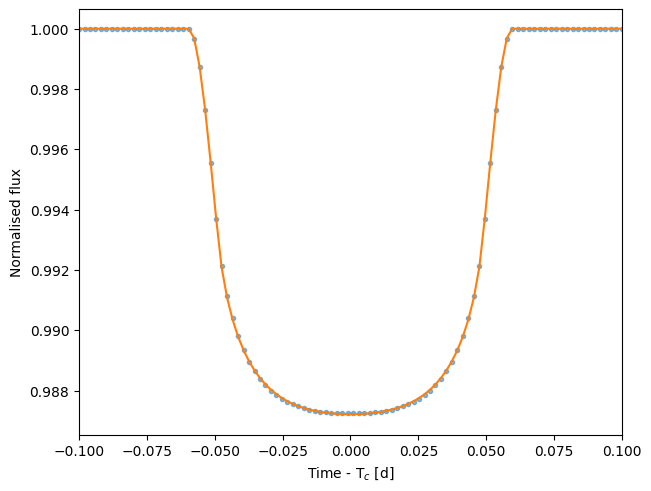

In [16]:
ta.plot_light_curves(method='posterior')

In [24]:
ta.plot_light_curves?

Signature:
ta.plot_light_curves(
    method='de',
    ncol: int = 3,
    width: Optional[float] = None,
    planet: int = 1,
    max_samples: int = 1000,
    figsize=None,
    data_alpha=0.5,
    ylim=None,
)
Docstring: <no docstring>
File:      ~/miniconda3/envs/pytrans/lib/python3.10/site-packages/pytransit/lpf/transitanalysis.py
Type:      method

In [17]:
ta.print_parameters(1)

  0 |G| rho            U(a = 0.1, b = 25.0)                     [    0.00 ..      inf]
  1 |G| tc_1           N(μ = 0.0, σ = 0.1)                      [    -inf ..      inf]
  2 |G| p_1            N(μ = 1.0, σ = 0.001)                    [    0.00 ..      inf]
  3 |G| b_1            U(a = 0.0, b = 1.0)                      [    0.00 ..      inf]
  4 |G| k2_1           U(a = 0.0004, b = 0.04000000000000001)   [    0.00 ..      inf]
  5 |G| secw_1         N(μ = 0.0, σ = 1e-05)                    [   -1.00 ..     1.00]
  6 |G| sesw_1         N(μ = 0.0, σ = 1e-05)                    [   -1.00 ..     1.00]
  7 |P| q1_Kepler      U(a = 0, b = 1)                          [    0.00 ..     1.00]
  8 |P| q2_Kepler      U(a = 0, b = 1)                          [    0.00 ..     1.00]
  9 |L| wn_loge_0      U(a = -4, b = 0)                         [    -inf ..      inf]


In [18]:
df = ta.posterior_samples()

/home/abraham/miniconda3/envs/pytrans/lib/python3.10/site-packages/arviz/data/inference_data.py:1509: UserWarning: The group derived_parameters is not defined in the InferenceData scheme
  warnings.warn(


In [19]:
df

Inference data with groups:
	> posterior
	> sample_stats
	> derived_parameters

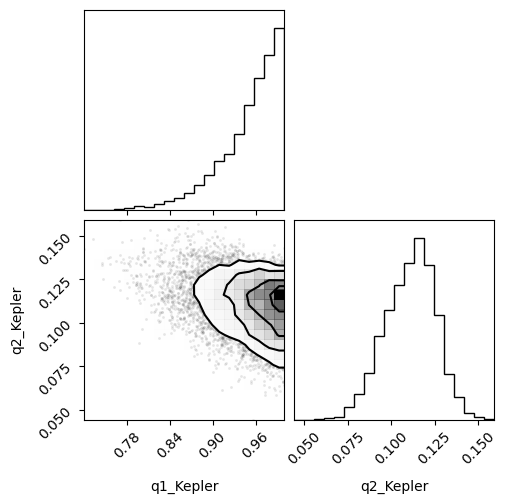

In [20]:
corner(df.posterior[['q1_Kepler', 'q2_Kepler']]);
